In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB

In [2]:
# loading all the necessary images
train_images = np.loadtxt('data_MNIST/data/train_images.txt')
test_images = np.loadtxt('data_MNIST/data/test_images.txt')
# loading the labels as integers
train_labels = np.loadtxt('data_MNIST/data/train_labels.txt', 'int')
test_labels = np.loadtxt('data_MNIST/data/test_labels.txt', 'int')

print(train_labels[:10])

[4 8 2 7 9 4 2 1 4 5]


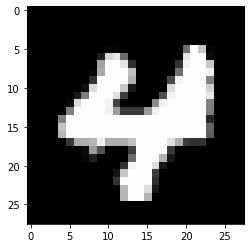

In [3]:
# getting the first image
image = train_images[0, :]
# reshaping it so we can plot it
image = np.reshape(image, (28, 28))
plt.imshow(image.astype(np.uint8), cmap='gray')
plt.show()

In [4]:
# 2)
def values_to_bins(data, bin_array):
    data_binned = np.digitize(data, bin_array)
    return data_binned

# because our data (the pixel values) are continuous values,
# we have to transform them into discrete values
# so, we set the number of intervals we want to split the data into
num_bins = 5

# getting the intervals
bins = np.linspace(start=0, stop=255, num=num_bins)
print(bins)

# and then we assign the interval number to each continuous value
# using np.digitize(x, bins)
train_binned = values_to_bins(train_images, bins)
test_binned = values_to_bins(test_images, bins)
print(train_binned)
print(test_binned)

# Note: element indexing starts at 1, because there are no values < 0

[  0.    63.75 127.5  191.25 255.  ]
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [5]:
# 3)
# defining the Multinomial Naive Bayes model
nbModel = MultinomialNB()
# fitting the model according to train_binned, train_labels
# train_binned = the training data
# train_labels = target values
nbModel.fit(train_binned, train_labels)
# returning the accuracy given the testing data
nbModel.score(test_binned, test_labels)

0.806

In [6]:
# 4)
maxi = 0
maxScore = 0
for num_bins in [3, 5, 7, 9, 11]:
    nbModel = MultinomialNB()
    bins = np.linspace(start=0, stop=255, num=num_bins)

    train_binned = values_to_bins(train_images, bins)
    test_binned = values_to_bins(test_images, bins)

    nbModel.fit(train_binned, train_labels)
    score = nbModel.score(test_binned, test_labels)
    print(score)

    if score > maxScore:
        maxi = num_bins
        maxScore = score

0.802
0.806
0.81
0.81
0.814


In [7]:
# 5)
nbModel = MultinomialNB()
num_bins = maxi
bins = np.linspace(start=0, stop=255, num=num_bins)

train_binned = values_to_bins(train_images, bins)
test_binned = values_to_bins(test_images, bins)

nbModel.fit(train_binned, train_labels)
score = nbModel.score(test_binned, test_labels)
print(score)

0.814


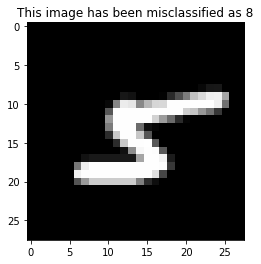

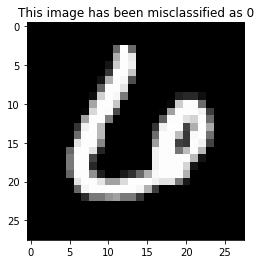

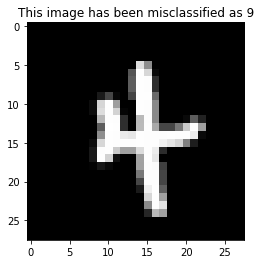

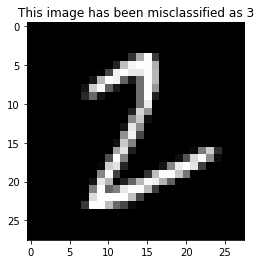

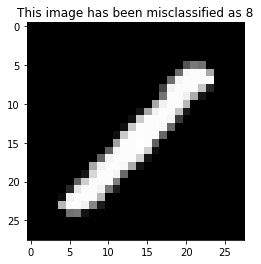

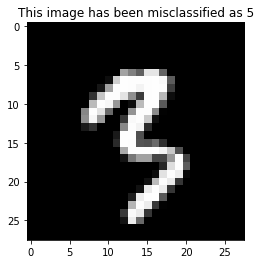

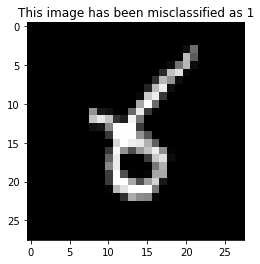

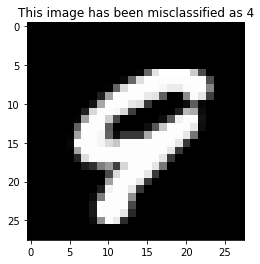

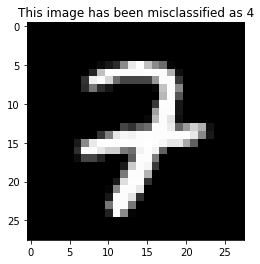

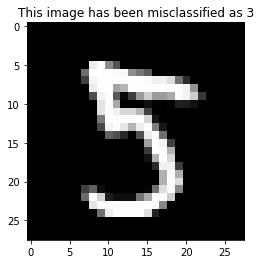

In [8]:
# getting the predicted output for testing data
predicted = nbModel.predict(test_binned)
# getting the misclassified images after the orediction
misclassified_images = test_images[predicted != test_labels]
misclassified_labels = predicted[predicted != test_labels]

# showing 10 misclassified images
for i in range(10):
    plt.imshow(misclassified_images[i].reshape(28, 28).astype(np.uint8), cmap='gray')
    plt.title(f'This image has been misclassified as {misclassified_labels[i]}')
    plt.show()

In [9]:
# 6)
c = np.zeros((10, 10))
for y_true, y_pred in zip(test_labels, predicted):
    c[y_true, y_pred] += 1

print(c)

[[49.  0.  0.  0.  0.  0.  3.  0.  1.  0.]
 [ 0. 49.  0.  0.  0.  0.  0.  0.  3.  0.]
 [ 2.  4. 43.  2.  2.  0.  3.  1.  1.  0.]
 [ 0.  0.  1. 49.  0.  1.  0.  0.  0.  2.]
 [ 0.  0.  0.  0. 36.  0.  0.  0.  1.  9.]
 [ 1.  1.  2.  9.  0. 32.  0.  0.  5.  2.]
 [ 2.  3.  0.  0.  1.  0. 41.  0.  1.  0.]
 [ 1.  2.  0.  0.  1.  0.  0. 41.  0.  5.]
 [ 0.  1.  2.  4.  0.  2.  1.  1. 34.  1.]
 [ 0.  0.  0.  1.  7.  0.  0.  0.  1. 33.]]
